In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import xarray as xr
import scipy.signal as signal
import matplotlib.pyplot as plt
import cartopy
import numpy as np
import numpy.ma as ma

from importlib import reload
import sys
sys.path.append('/home/students/4302001/arctic-connectivity/tools')
import plot
import lifeline
import fieldsetter

In [2]:
# Run in case you're debugging
reload(plot)
reload(lifeline)
reload(fieldsetter)

<module 'fieldsetter' from '/home/students/4302001/arctic-connectivity/tools/fieldsetter.py'>

In [3]:
# Specify paths to velocity field and mesh
#readdir_ocean = '/Users/daanreijnders/Datasets/'
#readdir_ice = '/Users/daanreijnders/Datasets/'

readdir_ice_control = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ice/arctic/'
readdir_ocean_control = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ocean/arctic/'
readdir_ocean_rcp = '/data/oceanparcels/input_data/CESM/0.1_deg/rcp8.5/ocean/arctic/'
readdir_mesh = '/scratch/DaanR/fields/'

fieldfile_ocean_control_old = 'daily_CESM_0.1degree_controlrun_year_300_arctic_region_timed_donotuse.nc'
fieldfile_ocean_control_new = 'daily_CESM_0.1degree_controlrun_year_300_arctic_timed_no_cord.nc'
fieldfile_ice_control = 'monthly_icefields_CESM_0.1degree_controlrun_year_300_arctic'
meshfile = 'POP_grid_lat1800plus.nc'

fieldfile_ocean_rcp1 = 'daily_CESM_0.1degree_rcp8.5run_years_2000-2010_arctic.nc'
fieldfile_ocean_rcp2 = 'daily_CESM_0.1degree_rcp8.5run_years_2011-2020_arctic.nc'

writedir = ''

In [4]:
U_field_old = xr.open_dataset(readdir_ocean_control+fieldfile_ocean_control_old)['UVEL_5m']
V_field_old = xr.open_dataset(readdir_ocean_control+fieldfile_ocean_control_old)['VVEL_5m']
U_field_new = xr.open_dataset(readdir_ocean_control+fieldfile_ocean_control_new)['UVEL_5m']
V_field_new = xr.open_dataset(readdir_ocean_control+fieldfile_ocean_control_new)['VVEL_5m']
U_field_rcp1 = xr.open_dataset(readdir_ocean_rcp+fieldfile_ocean_rcp1)['UVEL_5m']
V_field_rcp1 = xr.open_dataset(readdir_ocean_rcp+fieldfile_ocean_rcp1)['VVEL_5m']
U_field_rcp2 = xr.open_dataset(readdir_ocean_rcp+fieldfile_ocean_rcp2)['UVEL_5m']
POP_mesh = xr.open_dataset(readdir_mesh+meshfile)
ULAT = POP_mesh['U_LAT_2D']
ULON = POP_mesh['U_LON_2D']

In [5]:
U_field_old['time'][0] # Check timestamp associated with field at index 115

<xarray.DataArray 'time' ()>
array('2000-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2000-01-01
Attributes:
    standard_name:  time
    axis:           T

In [7]:
U_field_rcp1.record #record is index

<xarray.DataArray 'record' (record: 4007)>
array([   0,    1,    2, ..., 4004, 4005, 4006])
Dimensions without coordinates: record

In [8]:
U_field_rcp2.record

<xarray.DataArray 'record' (record: 3650)>
array([   0,    1,    2, ..., 3647, 3648, 3649])
Dimensions without coordinates: record

In [9]:
U_field_rcp1.time # First set runs from 2001-01-09 till 2010-31-31

<xarray.DataArray 'time' (time: 1)>
array([20000109.])
Coordinates:
  * time     (time) float64 2e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T

In [10]:
U_field_rcp2.time 

<xarray.DataArray 'time' (time: 1)>
array([20110101.])
Coordinates:
  * time     (time) float64 2.011e+07
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T

In [11]:
U_field_rcp1.shape

(4007, 1, 600, 3600)

In [8]:
U_field_old.shape

(365, 601, 3600)

(<Figure size 432x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fa43738c7f0>)

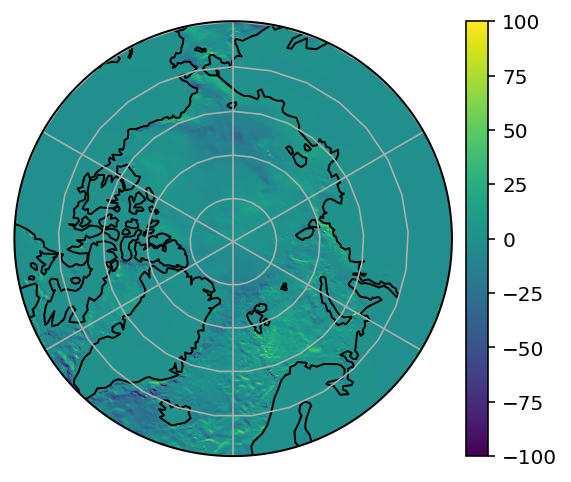

In [15]:
plot.from_dataset(ULON, ULAT, U_field_rcp[0,0,:,:], latRange=(60,90), polar=True, vmin=-100, vmax=100)

(<Figure size 432x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fa4372acb70>)

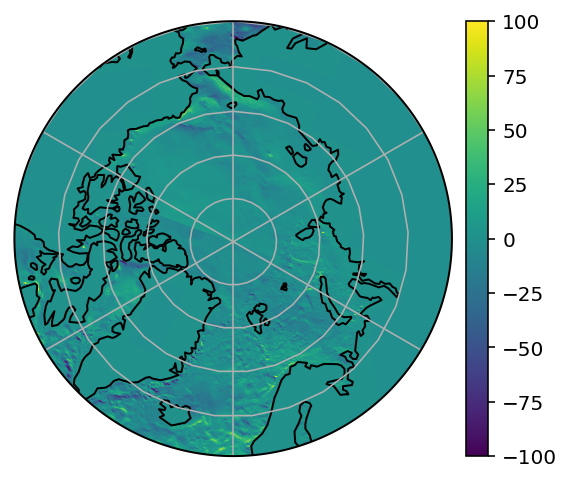

In [16]:
plot.from_dataset(ULON, ULAT, U_field_rcp[-10,0,:,:], latRange=(60,90), polar=True, vmin=-100, vmax=100)

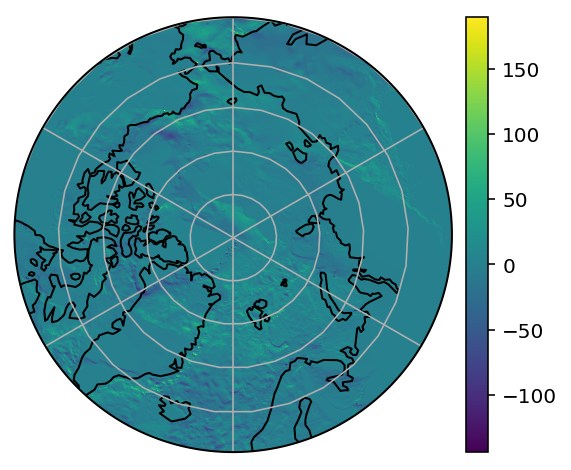

In [6]:
plot.from_dataset(ULON, ULAT, U_field_old[300,1:,:]-U_field_old[0,1:,:], latRange=(60,90), polar=True)

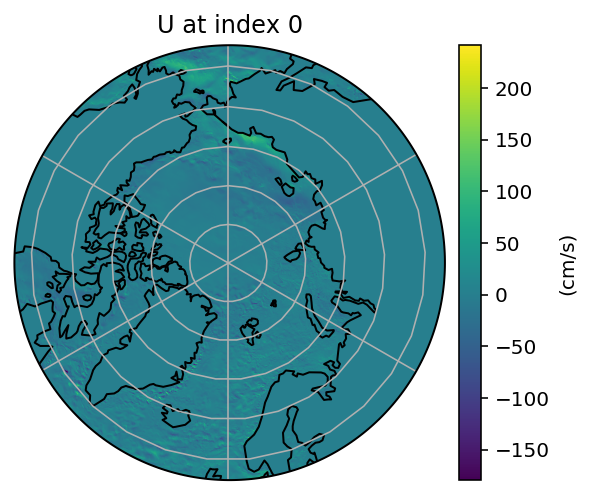

CPU times: user 15.7 s, sys: 1.65 s, total: 17.3 s
Wall time: 16.2 s


In [10]:
%%time
plot.from_dataset(ULON, ULAT, U_field_new[300,:,:]-U_field_new[0,:,:], latRange=(57,90), polar=True, title='U at index 0', units='cm/s', export='clipping_example.png')

# Comparing RCP datasets
First we construct a mask of land cells.

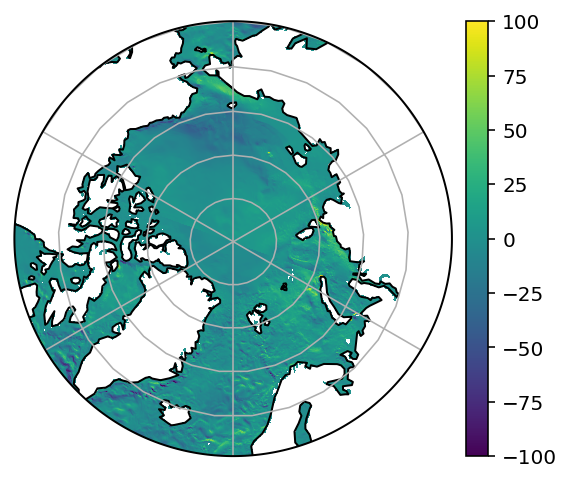

In [14]:
ma0 = ma.masked_equal(U_field_rcp1[1,0,:,:], 0)
ma1 = ma.masked_equal(U_field_rcp1[1,0,:,:], -1)
mask = np.logical_and(ma0, ma1).mask
fig, ax = plot.from_dataset(ULON, ULAT, ma.array(U_field_rcp1[1,0,:,:], mask=mask), latRange=(60,90), polar=True, vmin=-100, vmax=100)

(<Figure size 432x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f3dc3392d30>)

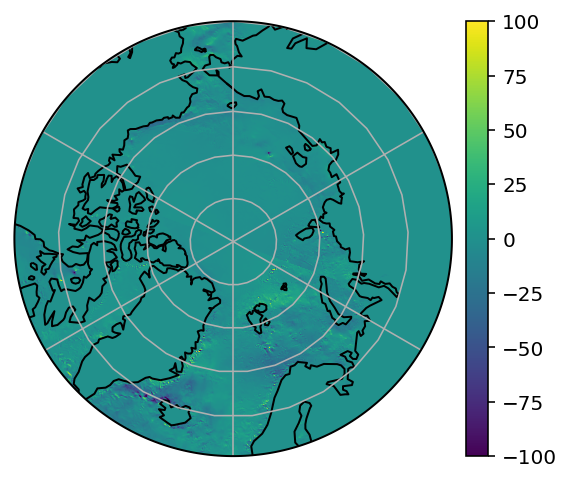

In [16]:
diff_rcp1 = U_field_rcp1[-1,0,:,:] - U_field_rcp1[-2,0,:,:]
plot.from_dataset(ULON, ULAT, diff_rcp1, latRange=(60,90), polar=True, vmin=-100, vmax=100)

(<Figure size 432x288 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f3dc31589e8>)

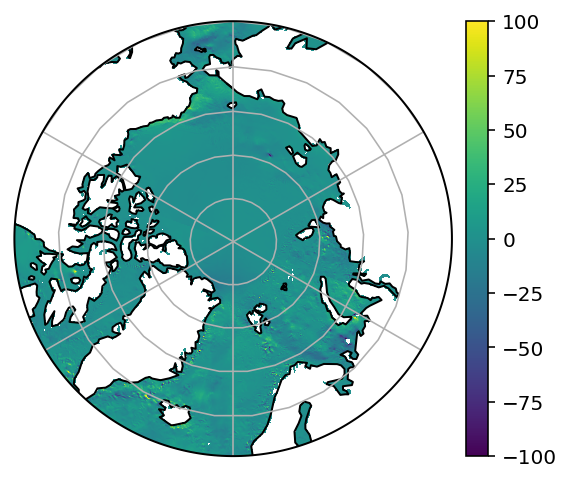

In [26]:
diff_rcp12 = ma.array(U_field_rcp2[0,0,:,:], mask=mask) - ma.array(U_field_rcp1[-1,0,:,:],mask=mask)
plot.from_dataset(ULON, ULAT, diff_rcp12, latRange=(60,90), polar=True, vmin=-100, vmax=100)

In [34]:
var_rcp12 = np.var(diff_rcp12)
mean_rcp12 = np.mean(diff_rcp12)
print(var_rcp12)
print(mean_rcp12)

67.6828629358863
-0.0883405718820119


To check whether the transition between data chunks is smooth, we plot the time series of variance in difference between time indices in the last 100 days of the first dataset and the first 100 days of the second dataset

In [35]:
diff_last_100 = np.diff(ma.array(U_field_rcp1[-101:-1,0,:,:], mask=np.tile(mask, (100,1))), axis=0)
var_last_100 = np.var(diff_last_100, axis=(1,2))
mean_last_100 = np.mean(diff_last_100, axis=(1,2))
diff_first_100 = np.diff(ma.array(U_field_rcp2[0:100,0,:,:], mask=np.tile(mask, (100,1))), axis=0)
var_first_100 = np.var(diff_first_100, axis=(1,2))
mean_first_100 = np.mean(diff_first_100, axis=(1,2))

In [36]:
vararr = np.hstack((var_last_100, var_rcp12, var_first_100))
meanarr = np.hstack((mean_last_100, mean_rcp12, mean_first_100))

In [37]:
fvar, Pxxvar = signal.periodogram(vararr)
fmean, Pxxmean = signal.periodogram(meanarr)

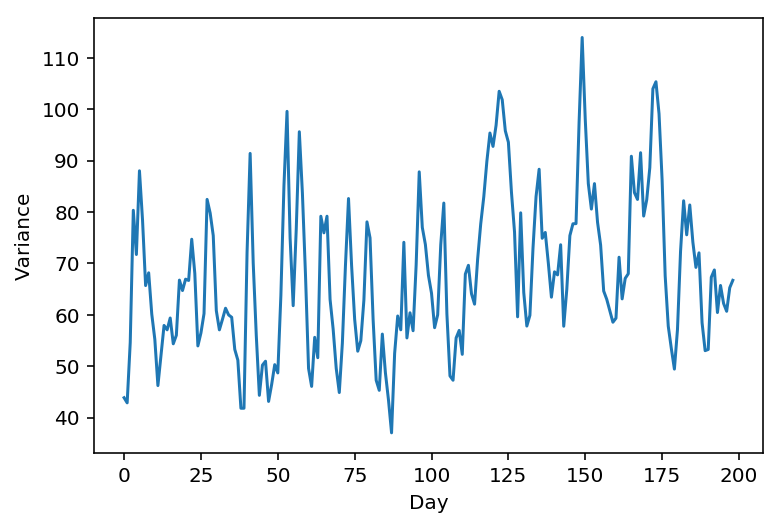

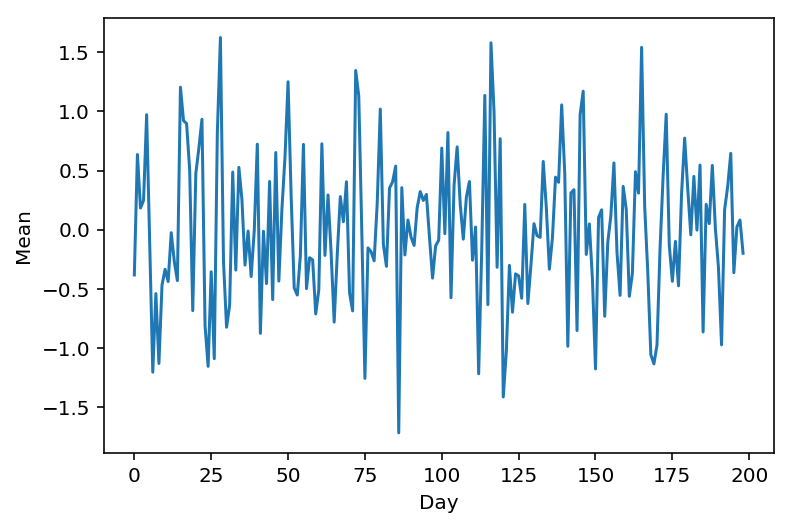

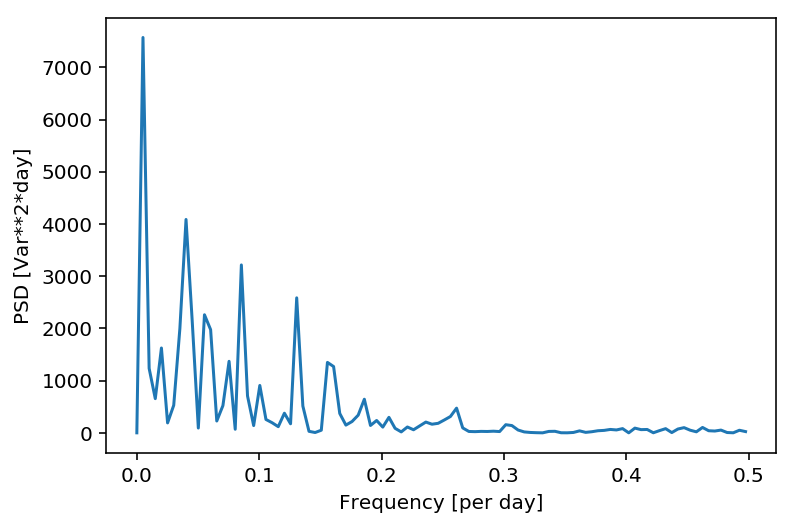

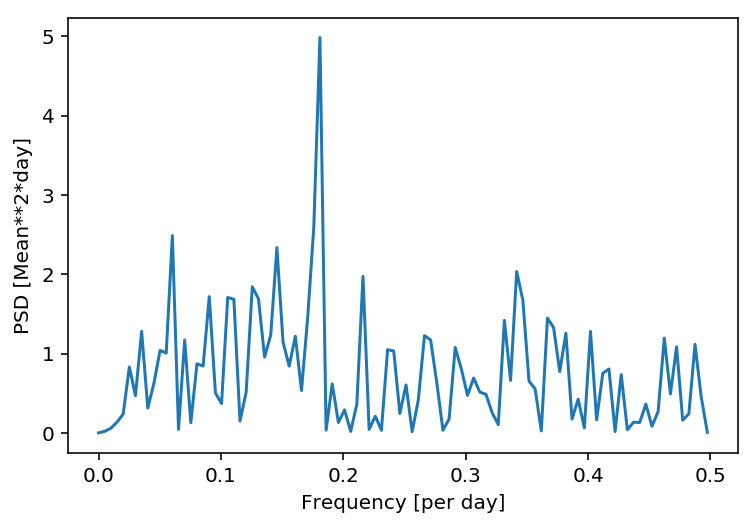

In [38]:
plt.plot(vararr)
plt.xlabel('Day')
plt.ylabel('Variance')
plt.show()

plt.plot(meanarr)
plt.xlabel('Day')
plt.ylabel('Mean')
plt.show()

plt.plot(fvar, Pxxvar)
plt.xlabel('Frequency [per day]')
plt.ylabel('PSD [Var**2*day]')
plt.show()

plt.plot(fmean, Pxxmean)
plt.xlabel('Frequency [per day]')
plt.ylabel('PSD [Mean**2*day]')
plt.show()

We see no extraordinarily high variance in the difference of the data around the change of age

# Load fieldsets

In [39]:
fieldset = fieldsetter.read_velocity_field(readdir_ocean_rcp+fieldfile_ocean_rcp1, meshfile=readdir_mesh+meshfile)

KeyError: 'ULON'

In [58]:
ds = xr.open_dataset(readdir_ocean_rcp+fieldfile_ocean_rcp1)

In [63]:
ds.assign_coords(record=np.array([np.datetime64('2001-01-09') + np.timedelta64(i, 'D') for i in range(4007)]))

<xarray.Dataset>
Dimensions:  (record: 4007, time: 1, x: 3600, y: 600)
Coordinates:
  * time     (time) float64 2e+07
  * record   (record) datetime64[ns] 2001-01-09 2001-01-10 ... 2011-12-29
Dimensions without coordinates: x, y
Data variables:
    UVEL_5m  (record, time, y, x) float32 ...
    VVEL_5m  (record, time, y, x) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.7.0 (http://...
    Conventions:                POP MOVIE conventions
    history:                    Mon Sep 16 16:30:22 2019: ncecat daan_1.nc da...
    title:                      POP MOVIE file
    nsteps_total:               240
    iyear:                      2000
    imonth:                     1
    iday:                       10
    tday:                       1.0
    NCO:                        "4.6.0"
    history_of_appended_files:  Mon Sep 16 15:52:22 2019: Appended file VVEL_...
    CDO:                        Climate Data Operators version 1.7.0 (http://...
    nco_

In [68]:
ds.drop(None, 'time')

KeyError: '[None] not found in axis'

In [54]:
xr.open_dataset(readdir_ocean_rcp+fieldfile_ocean_rcp1).time 

AttributeError: cannot set attribute 'time' on a 'Dataset' object. Use __setitem__ style assignment (e.g., `ds['name'] = ...`) instead to assign variables.

In [46]:
xr.open_dataset(readdir_mesh+meshfile)

<xarray.Dataset>
Dimensions:   (i_index: 3600, j_index: 600)
Coordinates:
  * i_index   (i_index) int32 1 2 3 4 5 6 7 ... 3595 3596 3597 3598 3599 3600
  * j_index   (j_index) int32 1801 1802 1803 1804 1805 ... 2397 2398 2399 2400
Data variables:
    U_LON_2D  (j_index, i_index) float32 ...
    U_LAT_2D  (j_index, i_index) float32 ...
Attributes:
    CDI:              Climate Data Interface version 1.9.6 (http://mpimet.mpg...
    Conventions:      CF-1.6
    history:          Fri Jun 14 00:12:42 2019: cdo selindexbox,1,3600,2,601 ...
    title:            t.t0.1_42l_nccs01.007502
    input_data:       t.t0.1_42l_nccs01.007502
    conversion_code:  produced with pop_da4_to_nc.f90
    CDO:              Climate Data Operators version 1.9.6 (http://mpimet.mpg...